In [148]:
from timesynth import TimeSampler
from timesynth.noise import GaussianNoise, RedNoise

In [149]:
GaussianNoise

timesynth.noise.gaussian_noise.GaussianNoise

In [12]:
import timesynth as ts
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt
from global_settings import DATA_FOLDER
sns.set()
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['axes.titlesize'] = 17
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

In [32]:
catalog = pd.read_csv(os.path.join(DATA_FOLDER, 'ASAS', 'catalog.csv'), index_col=0)
# macho_catalog = pd.read_csv(os.path.join(DATA_FOLDER, 'MACHO_dataset.dat'), index_col=0)

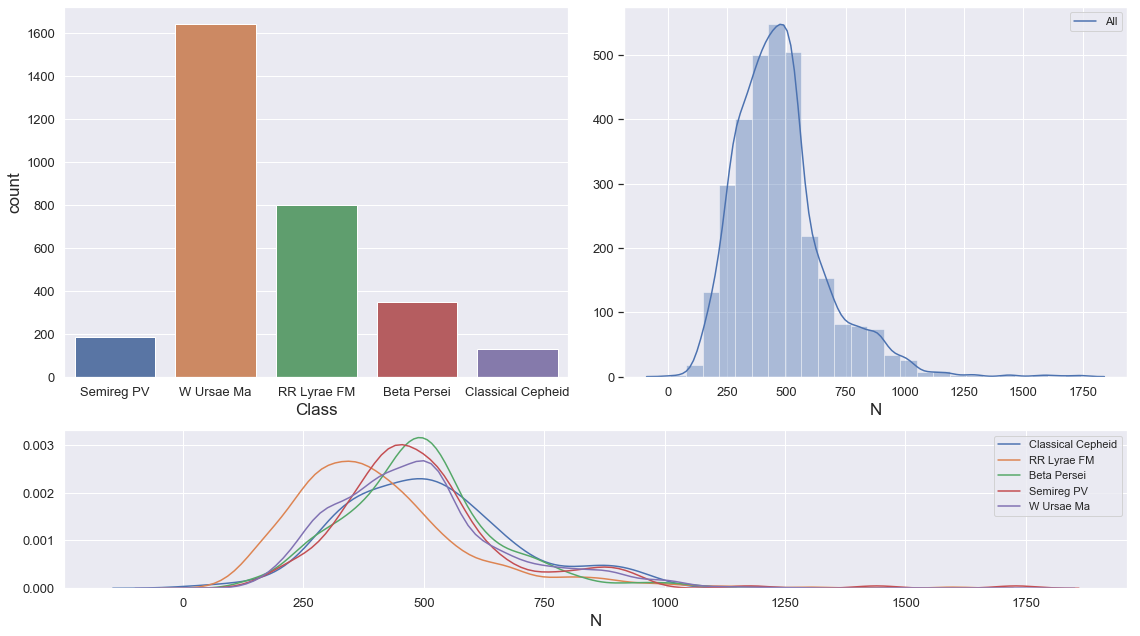

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(16, 9))
gs = gridspec.GridSpec(3, 2)
ax1 = plt.subplot(gs[0:2, 0])
ax2 = plt.subplot(gs[0:2, 1])
ax3 = plt.subplot(gs[2, :])

sns.countplot(catalog['Class'], ax=ax1)
sns.distplot(catalog['N'], bins =25, hist=True, kde=False, ax=ax2)
ax2_ = ax2.twinx(); ax2_.set_yticks([])
sns.distplot(catalog['N'], hist=False, ax=ax2_, label='All')
for _ in list(set(catalog['Class'])): 
    sns.distplot(catalog[catalog['Class'] == _]['N'], bins =25, hist=False, kde=True, ax=ax3, label=_)
plt.tight_layout()

fig.savefig(os.path.join('/Users/mingyu/Desktop/data_exp.png'))

In [4]:
from tools.data_tools import data_loader
x, y = data_loader('MACHO', 'train')

100%|██████████| 1467/1467 [00:03<00:00, 477.88it/s]


In [5]:
import numpy as np
np.shape(y)

(1467, 7)

In [ ]:
from model.lstm import run_lstm
run_lstm('MACHO')

In [8]:
inputs[1, 5, :]

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]

In [27]:
from sklearn.metrics import confusion_matrix
import numpy as np
matrix = confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"], normalize='true')
matrix = np.around(matrix, decimals=2)
matrix

array([[1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.33, 0.  , 0.67]])